#### importar librerías

In [3]:
#importo algrebra lineal
import matplotlib
import numpy as np

In [4]:
#procesamiento de datos
import pandas as pd

In [5]:
#visualización de datos
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

In [6]:
#algoritmos
from sklearn import linear_model
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB 

### importar los datos

In [7]:
#importo los datos
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

### Exploración de datos 

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


el set de entrenamiento tiene 891 filas x 12 columnas entre las que se encuentra la variable target, que es "Survived". Entre ellas 5 variables son int, 2 float y 5 object

In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Aqui vemos que la media de supervivencia es del 38.3%, y que el rango etario va de los 4 a los 80 años. Y vemos que por ejemplo la variable "Age" posee 714 valores, lo cual nos indica la presencia de valores faltantes.

In [10]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Aca vemos que hay que convertir algunas variables a numéricas, para que los algoritmos de Machine Learning las puedas procesar. Además notamos una diferencia de escalas entre las variables, por lo que deberemos escalarlas para evitar problemas a la hora de trabajarlos. Además notamos más claramente la presencia de NaN (valores faltantes)

In [11]:
total = train_df. isnull().sum().sort_values(ascending=False)
porcentaje_1= train_df.isnull().sum()/train_df.isnull().count()*100
porcentaje_2=(round(porcentaje_1, 1)).sort_values(ascending=False)
datos_faltantes=pd.concat([total,porcentaje_2], axis=1, keys=["Total", "%"])

datos_faltantes.head(10)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


La variable "Embarked" presenta sólo dos valores faltantes, lo cual puede ser sencillamente rellenado. El problema aparece con las variable "Age", la cual tiene casi un 20% de valores faltantes. Por su parte, la variable "Cabin" requiere revisarla más para ver de donde surge el error, aunque es problable que la desestimemos debido a la gran cantidad de valores faltantes que tiene (77.1%)

In [12]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

Aquí vemos los nombres de las columnas para ver a simple vista cuál creemos que puede contribuir a entender la variable target (Survived). A priori "PassengerID", "Ticket" y "Name" son variables que no me dan mucho peso sobre la variable target, por ello las desestimaremos. De todos modos, indagaremos más sobre cada variable para conocer su distirbución y relación con la variable target.

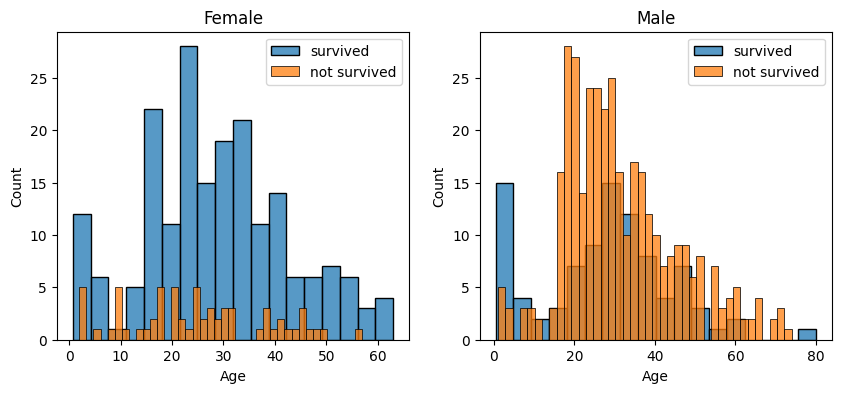

In [13]:
#Age y Sex
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.histplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.histplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.histplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.histplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

la probablidad de sobrevivir aumenta entre los 14 y los 30s, principalmente entre mujeres. Para mujeres la probablidad de vivir aumenta entre los 14 y los 40 años.
Entre los hombres, la probabilidad de sobrevivir entre los 4 y los 18 es muy baja, lo cual no se corrobora en el caso de las mujeres. 
Como entre ciertos rangos de edad la probabilidad de sobrevivir aumenta, y como hay ciertas variables que requieren escalarse se crearán grupos de edad próximamente.

C:\Users\jiperez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\jiperez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\jiperez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f7

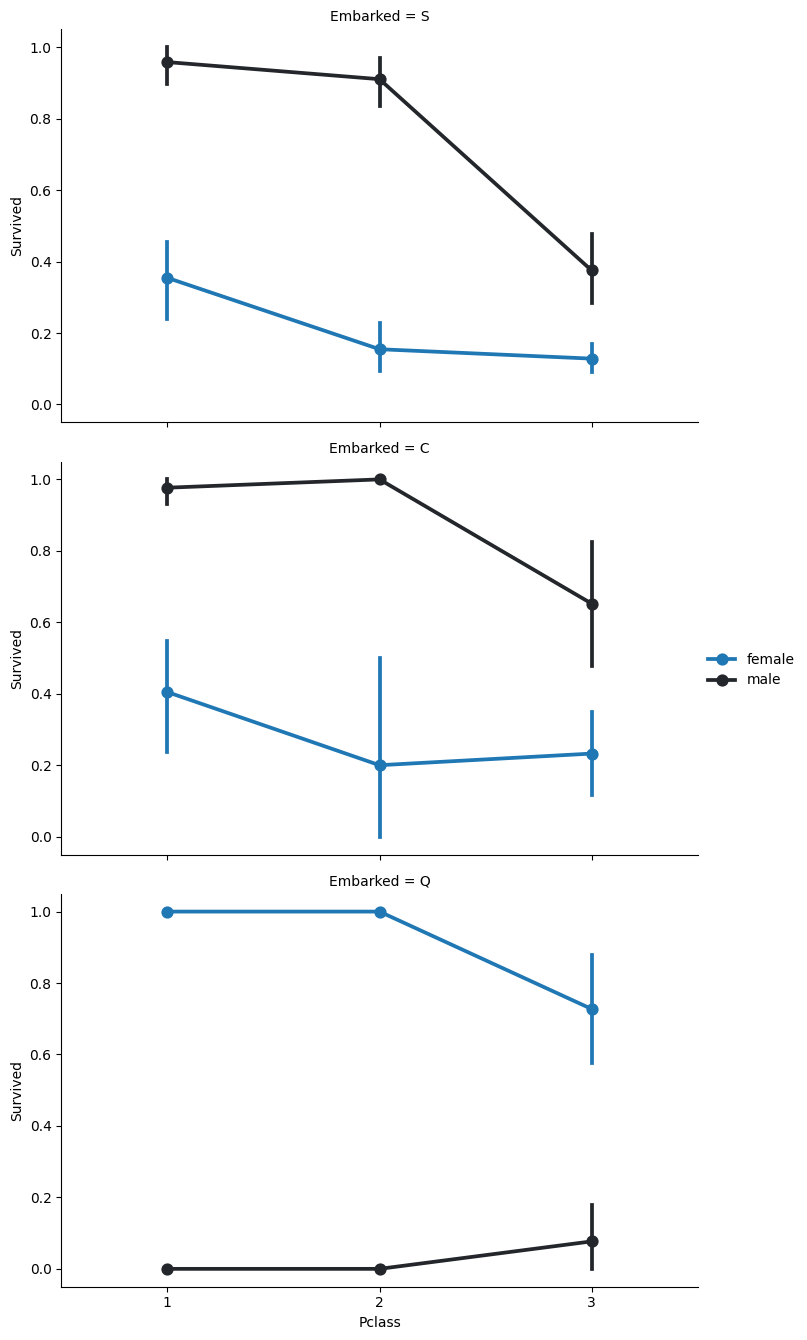

In [14]:
#Embarked, Pclass and Sex
FacetGrid = sns.FacetGrid(train_df, row='Embarked', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

Aquí parece ser que el lugar del embarco tiene correlación con la variable target, dependiendo del sexo, donde las mujeres en los puertos Q y S tiene altas chances de sobrevivir. Los hombres tienen mas chances de sobrevivir si estan en el puerto C, a la vez que tienen menos probabilidad si estan en los puertos Q y S. La variable PClass también parece tener correlación, pero no se llega a distinguir del todo, por lo que generaremos otro gráfico. 

<Axes: xlabel='Pclass', ylabel='Survived'>

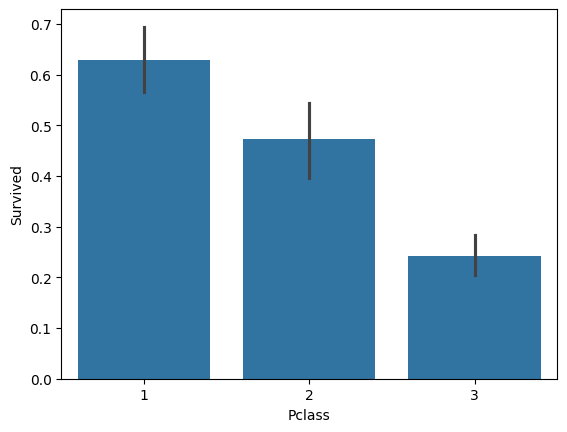

In [15]:
#Pclass
sns.barplot(x="Pclass", y="Survived", data=train_df)

Aquí vemos con más claridad que Pclass contribuye a la probabilidad de sobrevivir, especialmente para aquellos pertenecientes a la clase 1. Ampliaremos en otro gráfico aquí abajo.

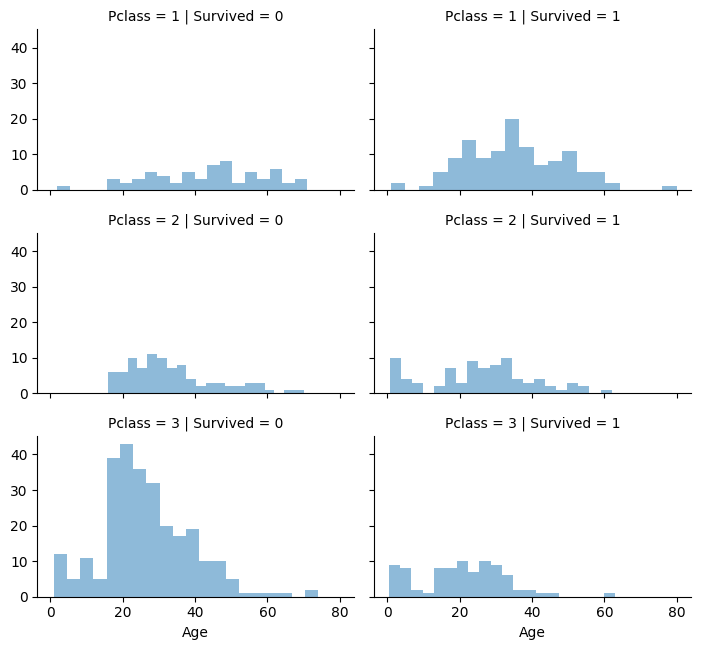

In [16]:
grid = sns.FacetGrid(train_df, col="Survived", row="Pclass", height=2.2, aspect=1.6)
grid.map(plt.hist, "Age", alpha=0.5, bins=20)
grid.add_legend()

Aquí confirmamos que la persona que pertenece a la clase 1 tiene más chances de sobrevivir. A su vez, la persona que esta en la clase 3, tiene alta probabilidades de no sobrevivir.

In [17]:
#SibSp (cantidad de hermanos o cónyuges) and Parch (cantidad de padres o hijos)
#Generaremos una variable para determinar si una persona viaja sola
data= [train_df, test_df]
for dataset in data: 
    dataset["relatives"] = dataset["SibSp"] + dataset["Parch"]
    dataset.loc[dataset["relatives"]>0, "not_alone"] = 0
    dataset.loc[dataset["relatives"]==0, "not_alone"] =1
    dataset["not_alone"] = dataset["not_alone"].astype(int)
 

In [18]:
train_df["not_alone"].value_counts()

not_alone
1    537
0    354
Name: count, dtype: int64

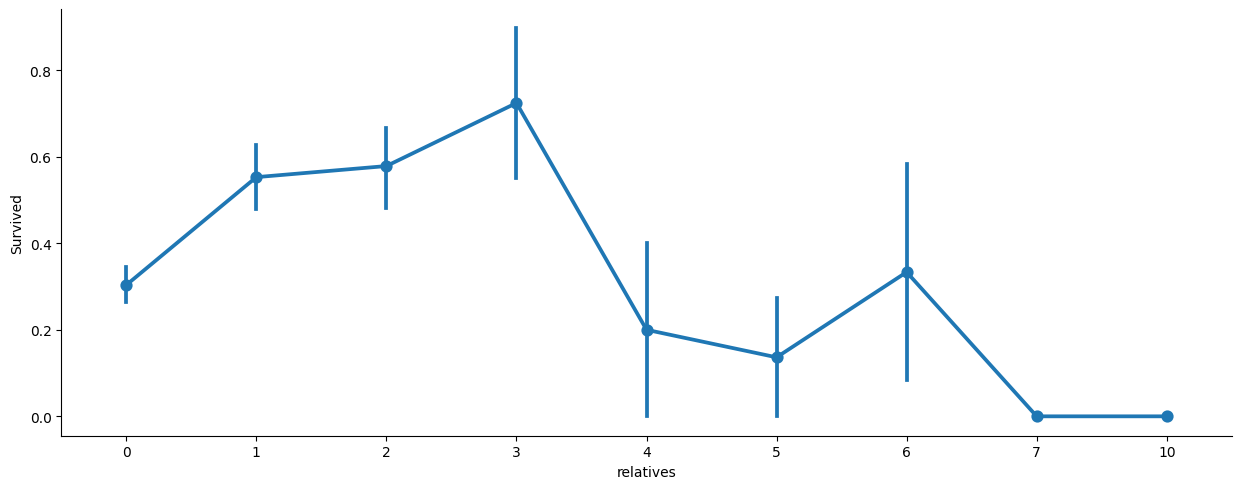

In [19]:
axes= sns.catplot(x="relatives", y="Survived", data=train_df, kind="point", aspect=2.5)

Aquí vemos que hay mayores probabilidades de sobrevivir entre aquellos que tiene de 1 a 3 parientes, mientras que ocurre lo contrario entre quienes tiene 4 o más, excepto en los casos de 6 parientes. 

#### preprocesamiento de los datos

Primero, eliminaremos la variables PassengersId del data set, porque no contribuye a la probabilidad de la supervivencia de las personas. Se eliminará sólo en el set de entrenamiento. 

In [20]:
train_df=train_df.drop(["PassengerId"], axis=1)

Tras revisar la variable Cabin, que presentaba gran número de faltantes, se determinó que a pesar de ser alfanumérica ("c123", "a123", etc.) representaba el piso con la letra y el número del camarote con el número, por lo que se convertirá a numérico todo y se dejará con número 0 los faltantes. 

In [21]:
import re
deck= {"A" : 1, "B" : 2, "C" : 3, "D" : 4, "E" : 5, "F" : 6, "G" : 7, "U" : 8}
data = [train_df, test_df]

for dataset in data:
    dataset["Cabin"] = dataset["Cabin"].fillna("U0")
    dataset["Deck"] = dataset["Cabin"].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset["Deck"] = dataset["Deck"].map(deck)
    dataset["Deck"] = dataset["Deck"].fillna(0)
    dataset["Deck"] = dataset["Deck"].astype(int)

In [22]:
#ahora la podemos sacar con la función .drop
train_df = train_df.drop(["Cabin"], axis=1)
test_df = test_df.drop(["Cabin"], axis=1)

Variable edad:
Vamos a encarar el problemas de los valores faltantes de esta variable. Crearé un array que contiene valores random, los cuales surgen en base a las media de acuerdo a la desviación estándar y al is_null

In [23]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = train_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    #computamos valores random entre la media, la desviación estándar y el is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    #llenamos los valores nulos de la columna Age con los valores random generados
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)

In [24]:
#verificamos que este todo bien
train_df["Age"].isnull().sum()

0

Variable Embarked:
Como esta variable tenía solo 2 valores faltantes, llenaremos estos dos con el valor más comun

In [25]:
train_df["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [26]:
common_value = "S"
data = [train_df, test_df]

for dataset in data:
    dataset["Embarked"] = dataset["Embarked"].fillna(common_value)

In [27]:
#verificamos que este todo bien
train_df["Embarked"].isnull().sum()

0

#### Convertimos variables

In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int32  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int32  
 12  Deck       891 non-null    int32  
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 80.2+ KB


trabajaremos la variable Fare (float64) para convertirla a entero

In [29]:
data = [train_df, test_df]

for dataset in data:
    dataset["Fare"] = dataset["Fare"].fillna(0)
    dataset["Fare"] = dataset["Fare"].astype(int)

variable nombre: 
usaremos la variable nombre para extraer los títulos del nombre para así poder construir una nueva variable con eso

In [30]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)

In [31]:
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

Convertimos Sex en variable numérica

In [32]:
genders = {"male" : 1, "female" : 2}

data = [train_df, test_df]

for dataset in data:
    dataset["Sex"] = dataset["Sex"].map(genders)

In [33]:
train_df["Sex"].unique()

array([1, 2], dtype=int64)

In [34]:
#variable ticket 
train_df["Ticket"].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

Como Ticket tiene 681 valores únicos, va a ser dificil convertirlos a numéricos para incluir esa varibale, así que la eliminaremos

In [35]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

Convertiremos la variable Embarked a numérica

In [36]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data: 
    dataset["Embarked"] = dataset["Embarked"].map(ports)

In [37]:
train_df["Embarked"].unique()

array([0, 1, 2], dtype=int64)

#### Creación de nuevas variables

Trabajaremos las variables Age y Fare:

Age: primero la convertiremos de Float a Int, luego creamos una variable "AgeGroup". Es importante entender cuales serán las edades que compondrán cada grupo, ya que no queremos que el 80% caiga en el grupo 1.


In [38]:
data = [train_df, test_df]
for dataset in data:
    dataset["Age"] = dataset["Age"].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [39]:
#Vemos su distribución
train_df['Age'].value_counts()

Age
6    164
4    163
5    142
3    141
2    116
1     97
0     68
Name: count, dtype: int64

Variable Fare: 
Para la variable Fare, necesitamos hacer lo mismo que la varibale Age. Pero no es tan sencillo ya que si agrupamos los valores de tarifas por rangos iguales, el 80% caerá en el primer grupo. Es por ello que usaremos la función de sklearn ".qcut()" para ayudarnos en la tarea de la división. 

In [40]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,1,2,1,0,7,0,1,0,8,1
1,1,1,2,5,1,0,71,1,1,0,3,3
2,1,3,2,3,0,0,7,0,0,1,8,2
3,1,1,2,5,1,0,53,0,1,0,3,3
4,0,3,1,5,0,0,8,0,0,1,8,1


In [41]:
data = [train_df, test_df]

for dataset in data: 
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [42]:
train_df["Fare"].unique()

array([0, 3, 1, 2, 5, 4])

#### Creación de nuevas variables: Agregaré dos variables nuevas, las cuales surgen de otras dos variables "Age" y "Fare".

1- Age times Class

In [43]:
data = [train_df, test_df]
for dataset in data:
    dataset["Age_Class"] = dataset["Age"]*dataset["Pclass"]

In [44]:
train_df["Age_Class"].unique()

array([ 6,  5,  9, 15,  0,  2,  3, 12,  8, 18, 10,  4,  1], dtype=int64)

2- Fare per Person

In [45]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

In [46]:
train_df["Fare_Per_Person"].unique()

array([0, 1, 3, 2, 4, 5])

In [47]:
#Veamos cómo quedo el dataset antes de pasar al modelado
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,1,2,1,0,0,0,1,0,8,1,6,0
1,1,1,2,5,1,0,3,1,1,0,3,3,5,1
2,1,3,2,3,0,0,0,0,0,1,8,2,9,0
3,1,1,2,5,1,0,3,0,1,0,3,3,5,1
4,0,3,1,5,0,0,1,0,0,1,8,1,15,1
5,0,3,1,3,0,0,1,2,0,1,8,1,9,1
6,0,1,1,6,0,0,3,0,0,1,5,1,6,3
7,0,3,1,0,3,1,2,0,4,0,8,4,0,0
8,1,3,2,3,0,2,1,0,2,0,8,3,9,0
9,1,2,2,1,1,0,2,1,1,0,8,3,2,1


#### Construyendo modelos de Machine Learning

In [48]:
X_train = train_df.drop("Survived", axis=1)
y_train = train_df["Survived"] 
X_test = test_df.drop("PassengerId", axis=1).copy()

In [49]:
# stochastic gradient descent (SGD) learning

sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

sgd.score(X_train, y_train)

acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
#imprimos la precisión (Accuracy) del modelo
print(round(acc_sgd,2,), "%")

73.06 %


In [50]:
#Random Forest

Random_forest = RandomForestClassifier(n_estimators=100)
Random_forest.fit(X_train, y_train)

Y_prediction = Random_forest.predict(X_test)

Random_forest.score(X_train, y_train)
acc_random_forest = round(Random_forest.score(X_train, y_train) * 100, 2)
#imprimos la precisión (Accuracy) del modelo
print(round(acc_random_forest,2,), "%")

92.93 %


In [51]:
#Logistic Regression 

from sklearn.linear_model import LogisticRegression


Logreg = LogisticRegression()
Logreg.fit(X_train, y_train)

Y_pred = Logreg.predict(X_test)

acc_logreg = round(Logreg.score(X_train, y_train) * 100, 2)

print(round(acc_logreg,2,), "%")

81.59 %


In [52]:
#KNN

knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train, y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, y_train) * 100, 2)

print(round(acc_knn, 2,), "%")

84.62 %


In [53]:
#Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

Y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, y_train) * 100 ,2)

print(round(acc_gaussian, 2,), "%")

77.89 %


In [54]:
#Perceptron

perceptron = Perceptron(max_iter= 5)
perceptron.fit(X_train, y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)

print(round(acc_perceptron,2,), "%")

77.89 %


C:\Users\jiperez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [55]:
#Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

print(round(acc_linear_svc, 2,), "%")

81.59 %


C:\Users\jiperez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\jiperez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [56]:
#Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

print(round(acc_decision_tree, 2,), "%")

92.93 %


**¿Cuál es el mejor modelo?**

In [57]:
results = pd.DataFrame({
   "Model" : ["Support Vector Machines", "KNN", "Logistic Regression", 
              "Random Forest", "Naive Bayes", "Perceptron", "Stochastic Gradient Decent",
              "Decision Tree"],
   "Score" : [acc_linear_svc, acc_knn, acc_logreg, acc_random_forest, acc_gaussian,
              acc_perceptron, acc_sgd, acc_decision_tree]})

results_df = results.sort_values(by = "Score", ascending=False)
results_df = results_df.set_index("Score")

results_df.head(9)

,Model
Score,
92.93,Random Forest
92.93,Decision Tree
84.62,KNN
81.59,Support Vector Machines
81.59,Logistic Regression
77.89,Naive Bayes
77.89,Perceptron
73.06,Stochastic Gradient Decent


Como vemos aqui arriba, el modelo de **Random Forest** es el más preciso de todos, con un 92.82% de Accuracy. Veamos ahora como perfoma a través de un cross-validation

K-Fold Cross Validation: 

El K-Fold Cross Validation divide aleatoriamente la data de entrenamiento en k subsets llamados folds (compartimentos/grupos). Imaginemos que dividimos nuestros datos en 4 folds (K = 4). Nuestro modelo de Random Forest sería evaluado y entrenado 4 veces, usando un grupo diferente por evaluación cada vez, mientras que sería entrenado en los 3 grupos restantes.

El resultado de nuestro K-Fold Cross Validation de ejemplo sería un Array que contenga 4 diferentes métricas. Entonces nosotros debemos computar la media y la desviación estándar para dichas métricas.

El código de aquí abajo perfoma el K-Fold Cross Validarion sobre nuestro modelo de Random Forest, usando 10 folds (K = 10). Es por ello que el resultado será un Array con 10 diferentes métricas.

In [58]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, y_train, cv = 10, scoring = "accuracy")

In [59]:
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.75555556 0.84269663 0.74157303 0.80898876 0.87640449 0.82022472
 0.82022472 0.7752809  0.84269663 0.82022472]
Mean: 0.8103870162297128
Standard Deviation: 0.03963927175446906


Ahora se ve mucho más realista que antes. Nuestro modelo tiene un Accuracy promedio de 82.8%, con una desviación estándar del 4%. La desvición estándar nos muestra que tan precisas son las estimaciones.     

Esto quiere decir que las desviaciones pueden diferir +- 4% de la realidad.

Creo que el accuracy sigue siendo muy bueno y debido a que el Random Forest es un modelo sencillo de utilizar, trataremos de mejorar su performance en lo que sigue.

**Random Forest**

-*¿Qué es el Random Forest?*

El Random Forest es un algoritmo supervisado de aprendizaje automático. Cómo se puede apreciar por su nombre, éste crea un bosque y lo convierte en aleatorio. El "bosque" que se construye, en un ensamble de árboles de decisión, mayormente entrenado con el método de "bagging" (embolsado/empaquetado). La idea general del método de bagging es que un acombinación de modelos de aprendizaje incrementa el resultado general.

Para decirlo en palabras sencillas: el Random Forest construye múltiples árboles de decisión y los une a todos para obtener mayor precisión y predicciones más estables.

Una gran ventaja del Random Forest es, que puede ser usado tanto para problemas de clasificación como de regresión, lo cual implica una gran ventaja comparativa. Con algunas exepciones un clasificador Random Forest tiene todos los hiperparámetros de un clasificador de árbol de decisión y todos los hiperparámetros de un clasificador bagging, para controlar el ensamble por sí solo. 

El algortimo de Random Forest trae aleatoriedad extra al modelo, a medida que el árbol crece. El lugar de buscar la mejor variable mientras divide un nodo, busca la mejor variable dentro de un subconjunto de variables aleatorias. Este proceso crea una amplia diversidad, lo cual generalmente resulta en ser un mejor modelo. Además cuando estas incrementando los árboles en el Random Forest, sólo un subconjunto de variable se considera para la división de un nodo. Puede hacer árboles incluso más aleatorios usando umbrales aleatorios encima, para cada variable en lugar de buscar los mejores umbrales prosibles (como lo hace un árbol de decisión normal).

-*Importancia de las variables:*

Otra gran cualidad del Random Forest es que puede hacer más sencillo la medida de importancia relativa de cada variables. Sklearn mide la importancia de una vairbales mirando cuántos nodos del árbol, que usa esa variable, reducen la impureza sobre el promedio (a lo largo de todos los árboles del bosque). Computa la metrica automáticamente para cada variable luego de entranar y escalar los resultados para que la suma de todas las importancia sea igual a 1.

Haremos esto aquí abajo:

In [60]:
importances = pd.DataFrame({"feature" : X_train.columns, "importance" : np.round(Random_forest.feature_importances_, 2)})
importances = importances.sort_values("importance", ascending=False).set_index("feature")

In [61]:
importances.head(15)

,importance
feature,
Title,0.22
Sex,0.16
Age_Class,0.09
Pclass,0.08
Age,0.08
Deck,0.08
Fare,0.07
relatives,0.06
Embarked,0.05


<Axes: xlabel='feature'>

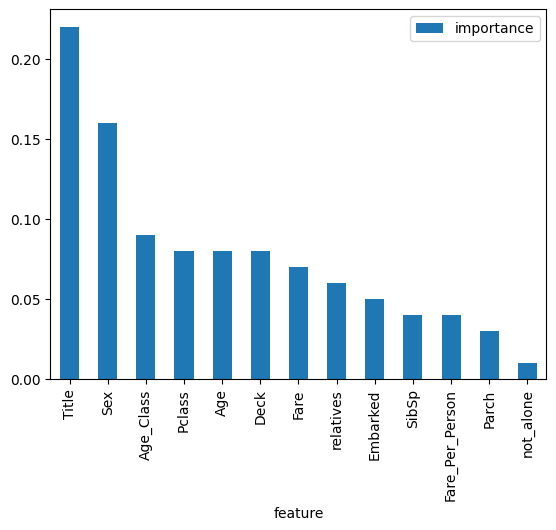

In [62]:
importances.plot.bar()

**Conclusión**

Parch y not_alone no juegan un rol significativo en nuestro proceso predicitivo del clasificador Random Forest. Es por ello que las eliminaremos del dataset y entrenaremos el clasificador nuevamente. Podríamos remover mas o menos variables, pero eso requiere investigación más detallada del efecto de las variables en nuestro modelo.

In [63]:
train_df = train_df.drop("Parch", axis=1)
test_df = test_df.drop("Parch", axis=1)

train_df = train_df.drop("not_alone", axis=1)
test_df = test_df.drop("not_alone", axis=1)

Entrenamos el modelo Random Forest nuevamente

In [64]:
#Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score=True)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

print(round(acc_random_forest, 2,), "%")


92.93 %


Nuestro modelo Random Forest predice tan bien como la hacía previamente. Una regla general es que, mientras más variables tenga, más probables tenderá al overfitting y vice versa. Pero al parecer nuestros datos se ven bien por ahora y no tiene tantas variables. 

Hay otra manera de evaluar el clasificador Random Forest, la cual es quizás más precisa que la métrica que usamos recién. Estoy hablando de los ejemplo "fuera del grupo" (out-of-bag) para estimar si es tan preciso que usando un conjunto de testeo del mismo tamaño que el de prueba. Además, el uso del estimador del error out-of-bag elimina la necesidad de reservar un grupo de testeo.

In [65]:
print("oob score:", round(random_forest.oob_score_, 4) * 100, "%")

oob score: 80.47 %


Ahora podemos personalizar los hiperparámetros del modelo

**Personalización de hiperparámetros**

In [66]:
#Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='sqrt', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 83.05 %


Ahora que tenemos un modelo apropiado, podemos comenzar a evaluar su performance de una manera más precisa. Previamente sólo usamos el accuracy y el oob score, el cual es sólo otra forma de accuracy. El problema es que, es más complicado evaluar un modelo de clasificación que uno de regresión. Hablaremos más en la siguiente sección.

**Evaluación adicional**

In [67]:
#Confusion Matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

predictions = cross_val_predict(random_forest, X_train, y_train, cv = 3)
confusion_matrix(y_train, predictions)

array([[495,  54],
       [ 92, 250]], dtype=int64)

La primera fila es sobre las predicciones de no sobrevivientes: 493 pasajeros fueron correctamente clasificados como no sobrevivientes (llamado verdaderos negativos) y 56 fueron erróneamente clasificados como no sobrevivientes (falsos negativos).

La segunda fila es sobre las predicciones de sobrevivientes: 92 pasajeros fueron erróneamente clasificados como sobrevivientes (falsos positivos), mientras que 250 fueron correctamente clasificados como sobrevivientes (verdaderos positivos).

Una matrix de confusion nos da mucha informacion sobre que tán bien tu modelo funciona, pero hay una manera de obtener más información, como computar clasificadores de precisión. 

**Precision and Recall:**

In [68]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train, predictions))
print("Recall:", recall_score(y_train, predictions)) 

Precision: 0.8223684210526315
Recall: 0.7309941520467836


Nuestro modelo predice 81% de las veces que los pasajeros sobreviven correctacamente (Precision). El Recall nos dice que predice la supervivencia del 73% de las presonas que realmente sobrevivieron.

**F-Score**

Se puede combinar la Precision y el Recall en una métrica, la cual es el F-Score. El F-Score esta compuesto por la media armónica de la Precision y el Recall. Nótese que éste asigna mucho más peso a los valores chicos. Como resultado, el clasificador sólo puede generar un F-Socre alto si tanto la Precision como el Recall son altos.

In [69]:
from sklearn.metrics import f1_score

f1_score(y_train, predictions)

0.7739938080495357

Aquí lo tenemos, un F-Score del 77%. El score no es tan alto, porque tenemos un Recall del 73%.

Pero desafortunadamente el F-Score no es perfecto, porque favorece a los clasificadores que tiene una Precision y un Recall similar. Este es el problema, porque a veces queremos una Precision alta y a veces un Recall alto. La cuestión es que una suba en la Precision, a veces resulta en una baja en el Recall y vice versa (dependiendo del límite). Esto se llama la compensación de la Precision/Recall. Discutiremos esto en la siguiente sección.

**Curva Precision Recall**

Para cada persona que el modelo Random Forest tiene que clasificar, computa una probabilidad basada en una función y clasifica a la persona somo sobreviviente (cuando la métrica es mayor que el límite) or como no sobreviviente (cuando la métrica es menor que el límite). Y esa es la razón por la que el límite juega un rol importante.

Graficaremos la Precision y el Recal con el límite, usando matplotlib:

In [70]:
from sklearn.metrics import precision_recall_curve

#getting the probabilities of our predictions
y_scores = Random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)

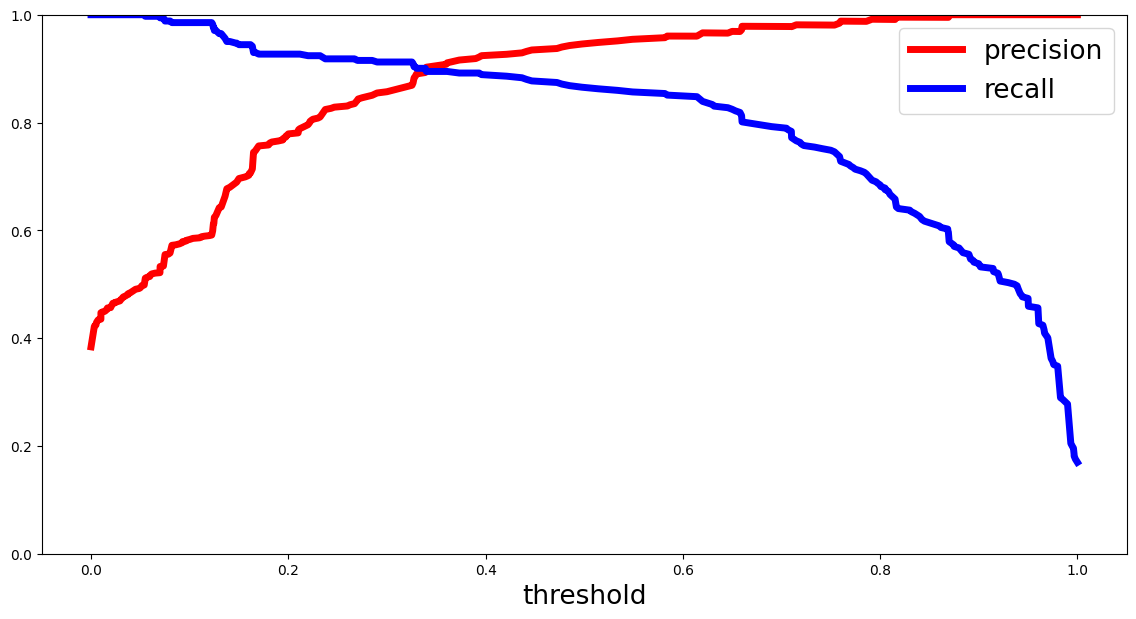

In [73]:
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

Arriba podemos ver claramente que el Recall esta cayendo abruptamente ante la precisión alrededor del 85%. A causa de ello uno podría seleccionar la compensación de la Precisión/Recall antes de ese 85%, quizas alrededor del 75%.

Ahora estamos dispuestos a elegir un límite, el cual nos de la mejor compensación Precision/Recall para el presente problema de Machine Learning. Si quisieramos, por ejemplo, una precisión del 80%, podríamos fácilmente mirar los gráficos y veeríamos que necesitamos un límite de alrededor del 0.4, Luego de eso podríamos entrenar el model con ese límite exacto y obtendríamos el Accuracy deseado.

Otra forma sería plotear la Precision y el Recall uno contra otro:

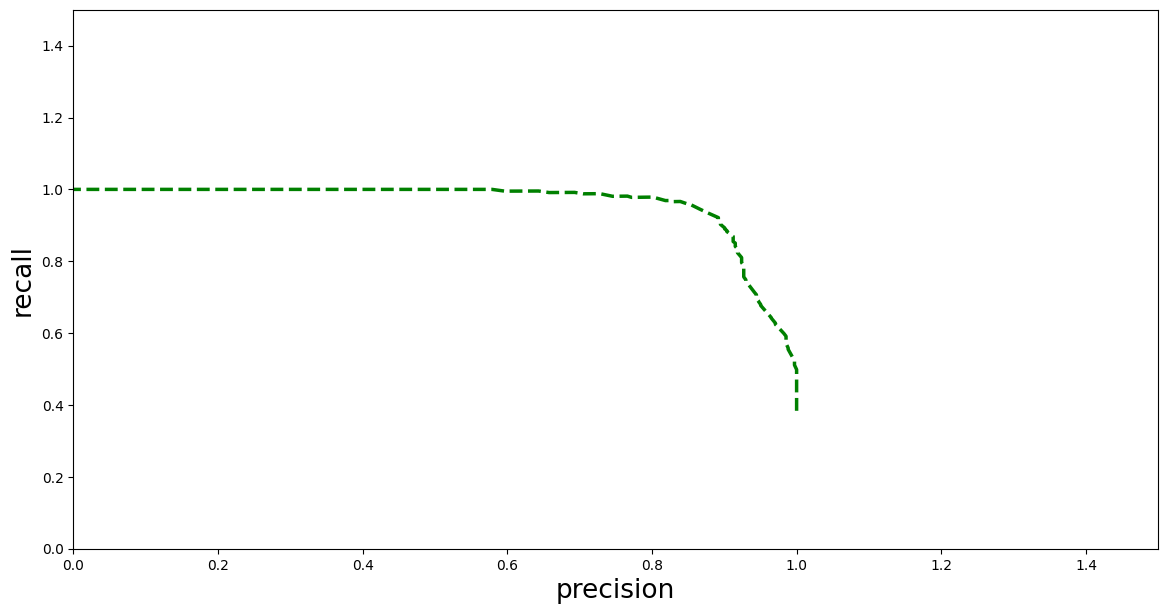

In [74]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth = 2.5)
    plt.ylabel("recall", fontsize = 19)
    plt.xlabel("precision", fontsize = 19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize = (14,7))
plot_precision_vs_recall(precision, recall)
plt.show()

**Curva ROC AUC**

Otra manera de evaluar y comparar el clasificador binario es a traves de la curva ROC AUC. Esta curva plotea la tasa de verdaders positivos (tambien llamado Recall) contra la tasa de falsos positivos (Tadsa de las instancias negativas clasificadas incorrectamente), en lugar de plotear la precision contra el recall.

In [75]:
from sklearn.metrics import roc_curve

#compute true positive rate and false positive rate

false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, y_scores)

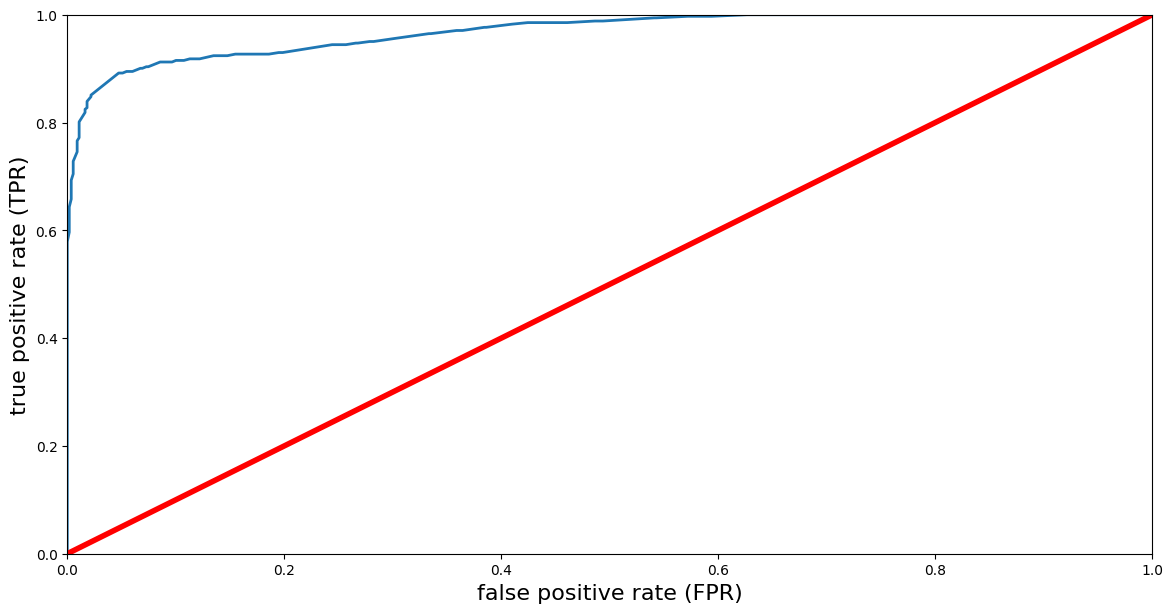

In [76]:
#plotting them against each other

def plot_roc_curve(false_positive_rate, true_positive_rate, label = None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth = 2, label = label) 
    plt.plot([0, 1], [0, 1], "r", linewidth = 4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel("false positive rate (FPR)", fontsize= 16)
    plt.ylabel("true positive rate (TPR)", fontsize = 16)

plt.figure(figsize = (14,7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()
    

La línea roja del medio representa un clasificador puramente aleatorio (como una moneda al aire) y por ese motivo tu clasificador debería tan lejos como sea posible. Nuestro modelo Random Forest pareciera hacer un buen trabajo.

Por supuesto que tenemos una compensación también aquí, por el clasificador produce más falsos positivos a medida que es mayor la tasa de verdaderos positivos.

**Métrica ROC AUC**

La métrica ROC AUC es la correspondiente métrica a la curva ROC AUC. Esta compuesto por la simple medida del área bajo la curva, la cual es llama AUC (Area Under Curve).

Un clasificador que es 100% correcto, tendría que tener una métrica ROC AUC de 1 y una clasificador completamente aleatorio tendría que tener una métrica de 0.5.

In [77]:
from sklearn.metrics import roc_auc_score

r_a_score = roc_auc_score(y_train, y_scores)

print("ROC-AUC-Score: ", r_a_score)

ROC-AUC-Score:  0.9679214733859542


Genial! El Score es lo suficientemente bueno.